(bayes-workflow-notebook)=
# Modellazione bayesiana

L'obiettivo di questo Capitolo è di introdurre il quadro concettuale dela modellizzazione bayesiana.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az
from scipy.stats import norm
from scipy.stats import beta
from scipy.stats import uniform

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")

## Esplorazione dei Fondamenti dei Metodi Bayesiani in Psicologia

Nel corso degli ultimi decenni, la psicologia ha visto un crescente utilizzo dei metodi bayesiani, un cambiamento significativo che ha portato a una più ampia integrazione dei modelli bayesiani nell'analisi e nell'interpretazione dei dati nel campo. Questa evoluzione è stata sostenuta da una vasta gamma di risorse formative, tra cui pubblicazioni e libri di testo specificamente rivolti agli psicologi ({cite:t}`brooks2003bayesian`; {cite:t}`van2017systematic`; {cite:t}`doing_bayesian_data_an`; {cite:t}`McElreath_rethinking`; {cite:t}`Johnson2022bayesrules`).

### Il Ciclo Continuo dell'Apprendimento Bayesiano

Il framework bayesiano può essere visto come un modello matematico del processo di apprendimento continuo, un fenomeno intrinseco a tutti gli esseri viventi. Questo ciclo iterativo di aggiornamento delle conoscenze si basa sul teorema di Bayes. In questo contesto, ogni nuovo set di dati osservati serve a raffinare la nostra comprensione o le nostre ipotesi su un determinato fenomeno. La distribuzione a posteriori ottenuta da un ciclo di apprendimento diventa la distribuzione a priori per il ciclo successivo, consentendo un aggiornamento sequenziale e indefinito delle informazioni, come enfatizzato da {cite:p}`wagenmakers2018creativity`.

### Dalla Generazione dei Dati alla Modellizzazione Bayesiana

Un elemento cruciale del framework bayesiano è la sua capacità di svelare i processi generativi che danno origine ai dati osservati, noti come Data-Generating Processes (DGP). In altre parole, l'inferenza statistica bayesiana mira a identificare i meccanismi non direttamente osservabili che sono responsabili dei dati raccolti. Questi DGP possono fungere da modelli statistici che incarnano specifiche ipotesi sul mondo reale. Per esempio, se l'ipotesi è che "le donne siano migliori degli uomini a scacchi", un modello statistico pertinente potrebbe prevedere che la media dei punteggi Elo delle donne sia superiore a quella degli uomini, una volta controllate le differenze di base nella frequenza di partecipazione. È fondamentale riconoscere che un singolo modello statistico può incorporare diversi DGP. Inoltre, che si parli di "ipotesi" o "modelli" è in gran parte una questione di terminologia; ciò che è realmente importante è che il framework bayesiano regola la modifica della plausibilità di queste ipotesi in risposta ai dati disponibili.

### Riallocazione della Credibilità e Aggiornamento Sequenziale delle Informazioni

Un esempio intuitivo spesso citato per illustrare i principi della riallocazione della credibilità e dell'aggiornamento sequenziale delle informazioni nel contesto bayesiano è il metodo investigativo di Sherlock Holmes. {cite:t}`doing_bayesian_data_an` utilizza l'iconico detective per mostrare come, in un'indagine su un crimine con quattro possibili cause (A, B, C e D), l'acquisizione di nuove prove possa portare all'esclusione di una di esse, ridistribuendo così la probabilità tra le rimanenti. In pratica, se Holmes raccoglie dati sufficienti per escludere la causa A, la probabilità associata a essa viene annullata e riallocata tra le cause B, C e D, rendendole tutte egualmente probabili come cause reali del crimine.

Tuttavia, è importante notare che nell'ambito della ricerca psicologica, dove i dati sono spesso imprecisi e le conclusioni di natura probabilistica, l'esclusione totale di un'ipotesi è rara. Invece, la sua credibilità potrebbe essere semplicemente ridotta, aumentando così la credibilità delle alternative.

Dal punto di vista statistico, le ipotesi in esame sono rappresentate dai valori dei parametri nei modelli matematici. All'interno del framework bayesiano, è possibile esplorare un'ampia gamma di scenari plausibili, tra i quali la credibilità viene continuamente riallocata. {cite:t}`doing_bayesian_data_an` enfatizza l'importanza di questo aggiornamento sequenziale delle informazioni, sottolineando la massima di Dennis Lindley secondo cui "il posterior di oggi diventa il prior di domani".

### La Modellizzazione Statistica: Un Ponte tra Teoria e Dati

Si potrebbe dire che la modellizzazione statistica bayesiana funge da ponte tra la teoria psicologica e i dati empirici. La modellizzazione statistica serve come strumento essenziale per decomporre la complessità dei fenomeni in questione in elementi più gestibili. Questa scomposizione facilita sia la comprensione che la simulazione del comportamento o dei processi studiati. Il successo di questa attività richiede un equilibrio tra competenza disciplinare e acume statistico, con l'obiettivo di tradurre teorie e dati empirici in modelli computazionali. 

Questa pratica di modellizzazione si avvale di due componenti fondamentali:

- Variabili casuali: Utilizzate per rappresentare le quantità sconosciute e per modellare le relazioni tra le variabili che compongono il fenomeno di interesse.
- Distribuzioni statistiche: Queste fungono da meccanismi matematici per organizzare e quantificare l'incertezza relativa ai parametri del modello, fornendo così una base solida per l'inferenza.

### Elementi distintivi dei modelli bayesiani

Nello specifico, la modellizzazione statistica bayesiana è caratterizzata da due particolarità:

- **Distribuzioni a priori**: attraverso le quali si esprimono le credenze iniziali sulle quantità sconosciute, definendo in questo modo i parametri del modello.
- **Aggiornamento bayesiano**: un processo durante il quale il teorema di Bayes viene utilizzato per modificare le distribuzioni a priori in base ai dati osservati, contribuendo a ridurre l'incertezza sui parametri del modello.

### Fasi dell'elaborazione di un modello bayesiano

La creazione di un modello bayesiano si sviluppa attraverso tre fasi essenziali:

1. **Formulazione del modello**: in questa fase, si progetta il modello a partire da informazioni preliminari e ipotesi sul processo generativo dei dati.
2. **Inferenza bayesiana**: durante questa fase, si applica il teorema di Bayes per aggiornare le credenze a priori basandosi sui dati osservati, giungendo a una distribuzione a posteriori.
3. **Valutazione e confronto dei modelli**: qui, si valuta la qualità del modello, verificandone la coerenza attraverso vari criteri e, se necessario, confrontandolo con altri modelli per identificare il più adatto.

Nel proseguimento di questo capitolo, esploreremo in profondità ciascuna delle fasi delineate sopra, delineando il percorso standard nel flusso di lavoro bayesiano. Per ulteriori dettagli, si invita a consultare {cite:t}`baribault2023troubleshooting`.

## Riesame del Teorema di Bayes

Per cominciare, denotiamo con $ Y $ una variabile casuale che assume un valore realizzato $ y $. Ad esempio, il punteggio di uno studente in un esame di Psicometria potrebbe essere considerato una variabile casuale $ Y $ che assume un ampio insieme di valori possibili. Una volta che lo studente riceve un voto nell'esame di Psicometria, la variabile casuale $ Y $ è ora realizzata come $ y $. Poiché $ Y $ è una variabile casuale non osservata, dobbiamo specificare un modello di probabilità per spiegare come abbiamo ottenuto i valori effettivi dei dati $ y $. Ci riferiamo a questo modello come il processo generatore di dati o DGP.

Successivamente, denotiamo con $ \theta $ un parametro che riteniamo caratterizzi il modello di probabilità di interesse. Il parametro $ \theta $ può essere uno scalare, come la media o la varianza di una distribuzione, o può essere un vettore, come un insieme di coefficienti di regressione nell'analisi di regressione. Per evitare troppa confusione notazionale, per ora useremo $ \theta $ per rappresentare sia parametri scalari che vettoriali dove la differenza sarà rivelata dal contesto.

Nell'inferenza statistica, l'obiettivo è ottenere stime dei parametri sconosciuti dati i dati. La differenza chiave tra l'inferenza statistica bayesiana e l'inferenza statistica frequentista riguarda la natura dei parametri sconosciuti $ \theta $. Nella tradizione frequentista, si assume che $ \theta $ sia sconosciuto, ma abbia un valore fisso che desideriamo stimare. Nell'inferenza statistica bayesiana, $ \theta $ è considerato anch'esso sconosciuto, ma invece di essere fisso, si suppone, come $ Y $, di essere una variabile casuale che possiede una distribuzione di probabilità a priori che riflette la nostra incertezza sul vero valore di $ \theta $ prima di aver visto i dati. Poiché sia i dati osservati $ y $ che i parametri $ \theta $ sono considerati variabili casuali, il calcolo delle probabilità ci consente di modellare la probabilità congiunta dei parametri e dei dati come una funzione della distribuzione condizionale dei dati dati i parametri, e la distribuzione a priori dei parametri. Più formalmente,

$$ 
\begin{equation}
p(\theta, y) = p(y \mid \theta)p(\theta), 
\end{equation}
$$ (eq-prob-congiunta-bayes)

dove $ p(\theta, y) $ è la distribuzione congiunta dei parametri e dei dati. Usando il teorema di Bayes dell'Eq. {eq}`eq-bayes-cont`, otteniamo il seguente:

$$ 
\begin{equation}
p(\theta \mid y) = \frac{p(\theta, y)}{p(y)} = \frac{p(y \mid \theta)p(\theta)}{p(y)},
\end{equation}
$$ (eq-bayes-revisited)

dove $ p(\theta \mid y) $ rappresenta la distribuzione a posteriori dei parametri $ \theta $ dati i dati osservati $ y $. Quindi, dall'Eq. {eq}`eq-bayes-revisited`, la distribuzione a posteriori di $ \theta $ dato $ y $ è uguale alla distribuzione dei dati $ p(y \mid \theta) $ moltiplicata per la distribuzione a priori dei parametri $ p(\theta) $ normalizzata per $ p(y) $ in modo che la distribuzione a posteriori  integri a 1. Per variabili discrete,

$$ 
p(y) = \sum_\theta p(y \mid \theta)p(\theta)  
$$

e per variabili continue,

$$ 
p(y) = \int p(y \mid \theta)p(\theta)d\theta.
$$

Come osservazione a margine, per modelli complessi con molti parametri, l'Eq. {eq}`eq-bayes-revisited` sarà molto difficile da valutare, ed è per questa ragione che abbiamo bisogno dei metodi computazionali che verranno discussi in seguito.

Il denominatore dell'Eq. {eq}`eq-bayes-revisited` non coinvolge i parametri del modello, quindi possiamo omettere il termine $p(y)$ e ottenere la distribuzione a posteriori non normalizzata:

$$ 
\begin{equation}
p(\theta \mid y) \propto p(y \mid \theta)p(\theta).
\end{equation}
$$ (eq-not-normalized-posterior)

Consideriamo la densità dei dati $ p(y \mid \theta) $ sul lato destro dell'Eq. {eq}`eq-not-normalized-posterior`. Quando è espresso in termini dei parametri sconosciuti $ \theta $ per valori fissi di $ y $, questo termine è la verosimiglianza $ L(\theta \mid y) $, che abbiamo discusso in dettaglio nel capitolo {ref}`notebook-likelihood`. Quindi, l'Eq. {eq}`eq-not-normalized-posterior` può essere riscritta come

$$ 
\begin{equation}
p(\theta \mid y) \propto L(\theta \mid y)p(\theta).
\end{equation}
$$ (eq-not-normalized-posterior-like)

Le Eq. {eq}`eq-not-normalized-posterior` o {eq}`eq-not-normalized-posterior-like` rappresentano il nucleo dell'inferenza statistica bayesiana ed è ciò che separa la statistica bayesiana dalla statistica frequentista.

## L'aggiornamento bayesiano

Per offrire una spiegazione quantitativa del procedimento di aggiornamento bayesiano, prendiamo in considerazione un esempio pratico: la localizzazione di un aeromobile disperso. In questo capitolo, ci concentriamo esclusivamente sulla comprensione della struttura logica del problema e sulla sua formalizzazione tramite l'impiego di distribuzioni di probabilità. In questa fase, tralasciamo i dettagli implementativi e mettiamo invece l'accento sul significato delle diverse fasi e degli obiettivi del processo di aggiornamento bayesiano. Successivamente, esamineremo le metodologie per conseguire tali obiettivi, approfondendo gli aspetti di natura computazionale.

L'illustrazione coinvolge un ipotetico scenario in cui un aereo è disperso nell'Oceano Pacifico. Ci troviamo in un contesto in cui la latitudine è determinata, ma la longitudine rimane ignota (disponiamo unicamente dell'indicazione della direzione del viaggio, senza conoscere la distanza percorsa). L'obiettivo principale è rifinire la stima della posizione approssimata ($\theta$) dell'aereo. Per raggiungere questo fine, gli operatori di soccorso raccolgono dati dai frammenti dei detriti che sono stati individuati.

Iniziamo il processo con una stima iniziale, definita come *distribuzione a priori*. Questa distribuzione di probabilità rappresenta il nostro grado di conoscenza sulla posizione dell'aereo prima di ricevere ulteriori dati o informazioni.

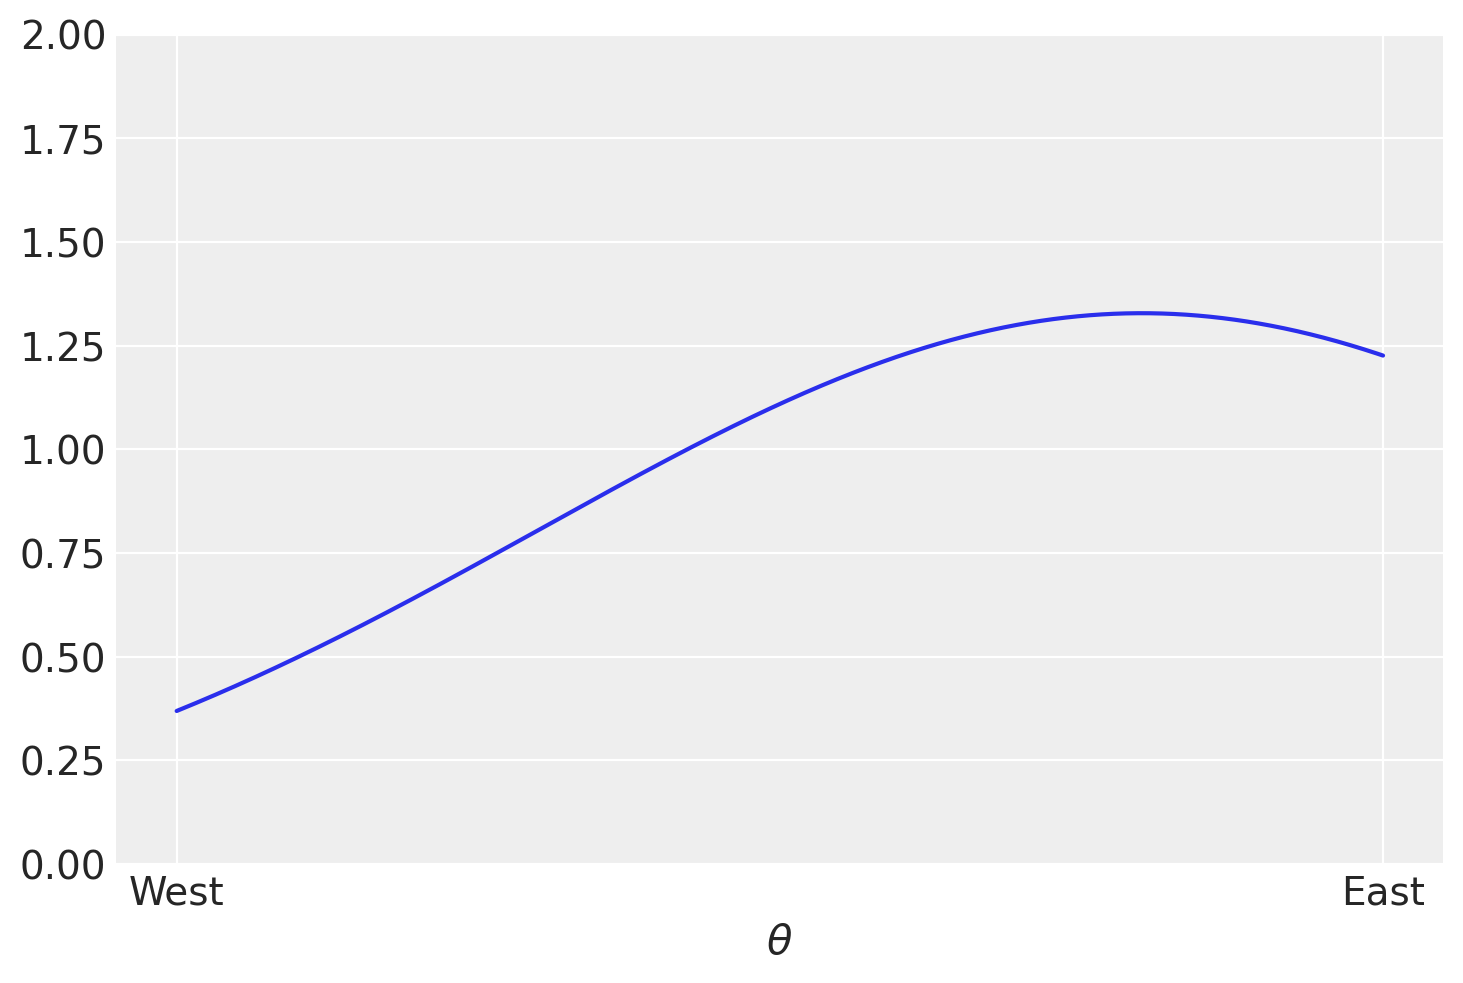

In [3]:
def dnorm_trunc(x, mean=0, sd=1, ll=0, ul=1):
    out = norm.pdf(x, mean, sd) / (norm.cdf(ul, mean, sd) - norm.cdf(ll, mean, sd))
    out[(x > ul) | (x < ll)] = 0
    return out

# Data points for x-axis
x_vals = np.linspace(0, 1, 1000)

# Parameters for the dnorm_trunc function
mean_val = 0.8
sd_val = 0.5

# Calculate the y values using dnorm_trunc function
y_vals = dnorm_trunc(x_vals, mean_val, sd_val)

# Plot the curve
plt.plot(x_vals, y_vals)
plt.ylim(0, 2)
plt.xlabel(r"$\theta$")
plt.ylabel("")
plt.xticks([0, 1], ["West", "East"])
plt.show()

Nel contesto bayesiano, una distribuzione di probabilità assume il compito di rappresentare l'incertezza o le convinzioni che nutriamo riguardo ai molteplici valori possibili che un parametro può assumere. Nel caso attuale, il parametro $\theta$ indica la longitudine associata alla posizione dell'aereo disperso nell'oceano Pacifico. La posizione esatta dell'aereo rimane sconosciuta. Tuttavia, formuliamo delle ipotesi iniziali sulle possibili localizzazioni. Per ogni valore possibile di $\theta$, la distribuzione di probabilità attribuisce un livello di fiducia che rispecchia quanto riteniamo probabile che quel valore specifico rappresenti il vero valore del parametro. I valori di $\theta$ associati a ordinate più elevate nella funzione indicano un grado superiore di fiducia, in quanto riteniamo che tali valori siano più propensi a rappresentare il vero valore del parametro. In contrasto, i valori di $\theta$ associati a ordinate più basse denotano convinzioni più deboli.

Sull'asse $x$ del grafico sopra riportato sono indicati i valori di $\theta$, cioè i diversi possibili valori della longitudine dell'aereo. Le estremità dell'asse delle ascisse sono etichettate come "West" (Ovest) e "East" (Est), per indicare che $\theta$ spazia da ovest a est. Lungo l'asse delle ordinate ($y$), sono tracciati i valori delle densità di probabilità associati a ciascun valore di $\theta$. 

Nel nostro caso specifico, la distribuzione a priori è centrata intorno a $\theta = 0.8$, suggerendo una previsione iniziale che l'aereo sia più verosimilmente situato ad est. Tuttavia, permangono incertezze considerevoli riguardo alla posizione esatta. Possiamo affermare, comunque, che inizialmente riteniamo che sia due volte più probabile che l'aereo si trovi ad est rispetto a ovest.

La scelta della distribuzione a priori rispecchia le convinzioni del ricercatore riguardo al problema in questione. Di conseguenza, diversi ricercatori potrebbero formulare diverse distribuzioni a priori per lo stesso problema, e tale diversità è accettabile, a patto che tali distribuzioni siano ragionevolmente giustificate. Nel prosieguo, scopriremo che nelle analisi Bayesiane, anche con campioni di dimensioni moderate, le varie distribuzioni a priori generano solitamente differenze trascurabili.

Ora, supponiamo di aver raccolto dei detriti nelle posizioni mostrate nel grafico seguente.

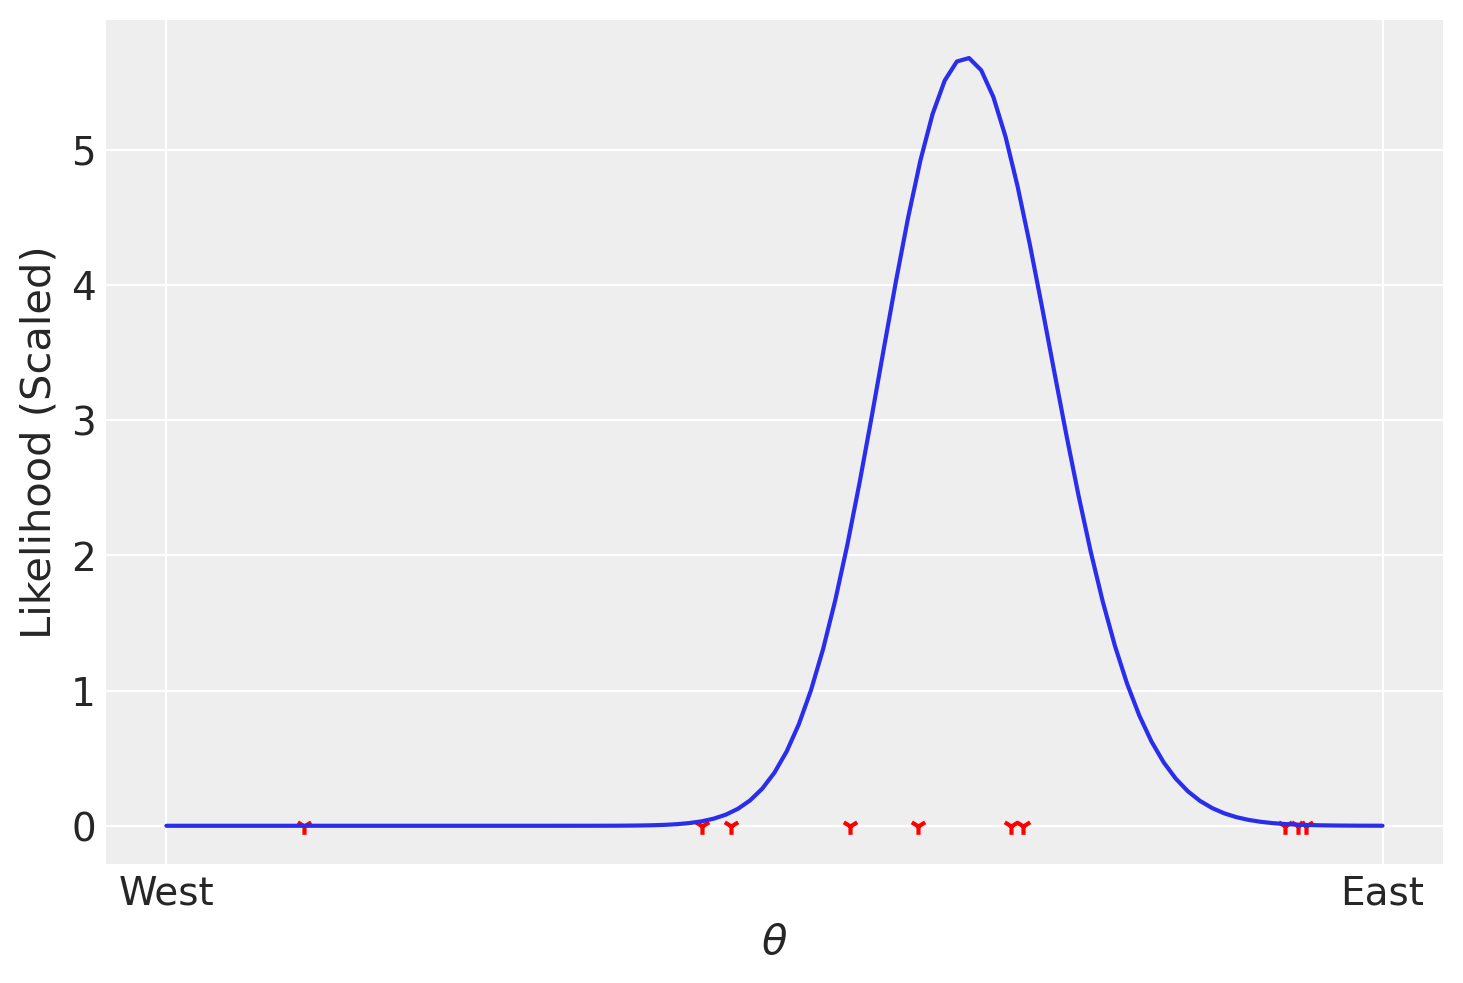

In [4]:
def qnorm_trunc(p, mean=0, sd=1, ll=0, ul=1):
    cdf_ll = norm.cdf(ll, loc=mean, scale=sd)
    cdf_ul = norm.cdf(ul, loc=mean, scale=sd)
    return norm.ppf(cdf_ll + p * (cdf_ul - cdf_ll), loc=mean, scale=sd)


def rnorm_trunc(n, mean=0, sd=1, ll=0, ul=1):
    p = np.random.uniform(size=n)
    return qnorm_trunc(p, mean=mean, sd=sd, ll=ll, ul=ul)


grid = np.linspace(0, 1, num=101)


def compute_lik(x, pts=grid, sd=0.2, binwidth=0.01):
    lik_vals = norm.pdf(x[:, np.newaxis], loc=pts, scale=sd) / (
        norm.cdf(1, loc=pts, scale=sd) - norm.cdf(0, loc=pts, scale=sd)
    )
    lik = np.prod(lik_vals, axis=0)
    return lik / np.sum(lik) / binwidth


np.random.seed(4)
dat_x = rnorm_trunc(10, mean=0.6, sd=0.2)
lik_x = compute_lik(dat_x)

plt.plot(grid, lik_x)
plt.scatter(dat_x, np.zeros_like(dat_x), color="red", marker="1")
plt.xlabel(r"$\theta$")
plt.ylabel("Likelihood (Scaled)")
plt.xticks([0, 1], ["West", "East"])
plt.show()

Dal Teorema di Bayes, è possibile derivare la distribuzione a posteriori attraverso il seguente procedimento:

$$
\text{Probabilità a posteriori} \propto \text{Probabilità a priori} \times
                                       \text{Verosimiglianza}.
$$

In altre parole, è sufficiente moltiplicare le probabilità a priori e la verosimiglianza al fine di ottenere la probabilità posteriore per ciascuna posizione. È importante garantire che l'area sotto la curva sia normalizzata a 1. Questo processo è conosciuto come *aggiornamento bayesiano*.

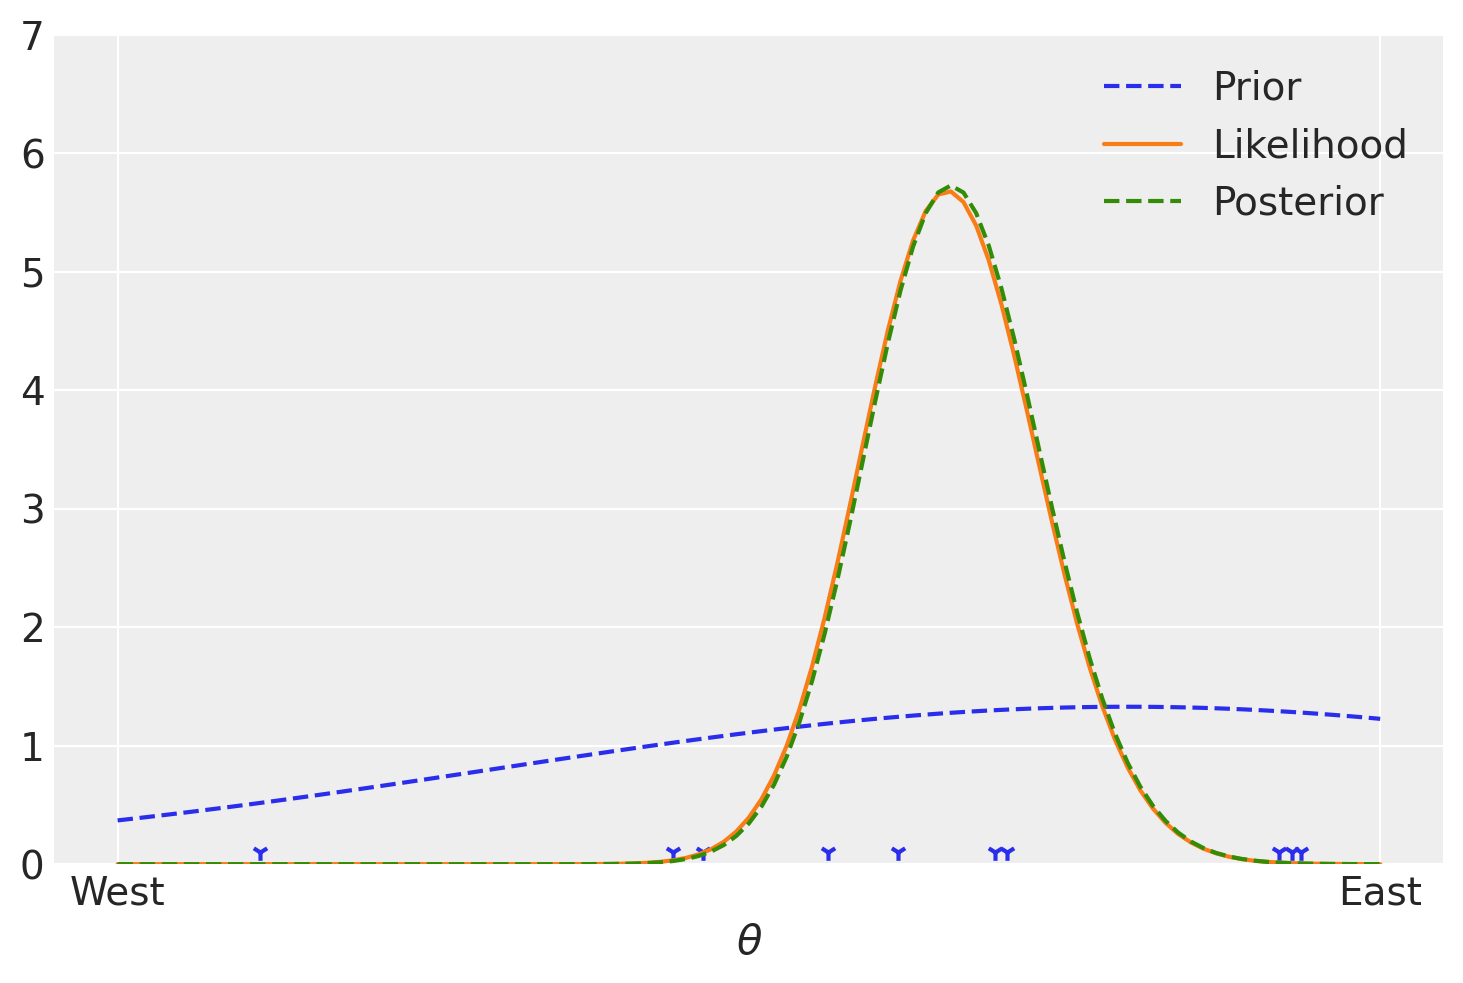

In [5]:
def update_probs(prior_probs, lik, binwidth=0.01):
    post_probs = prior_probs * lik
    return post_probs / np.sum(post_probs) / binwidth

grid = np.linspace(0, 1, num=101)

# Prior probabilities
prior_probs = dnorm_trunc(grid, mean=0.8, sd=0.5)

# Likelihood values
lik_x = compute_lik(dat_x)

# Posterior probabilities
posterior_probs = update_probs(prior_probs, lik_x)

# Plotting
plt.plot(grid, dnorm_trunc(grid, mean=0.8, sd=0.5), linestyle='dashed', label='Prior')
plt.plot(grid, lik_x, linestyle='solid', label='Likelihood')
plt.plot(grid, posterior_probs, linestyle='dashed', label='Posterior')
plt.scatter(dat_x, np.zeros_like(dat_x)+.1, marker='1')
plt.ylim(0, 7)
plt.xlabel(r'$\theta$')
plt.ylabel('')
plt.xticks([0, 1], ["West", "East"])
plt.legend()
plt.show()

In questa situazione, è evidente che una distribuzione a priori come quella descritta in precedenza, che definiremo "debolmente informativa", ha un impatto trascurabile e la distribuzione a posteriori risulta quasi indistinguibile dalla verosimiglianza (che è stata normalizzata).

Ora, esamineremo come si comporta una distribuzione a priori maggiormente informativa.

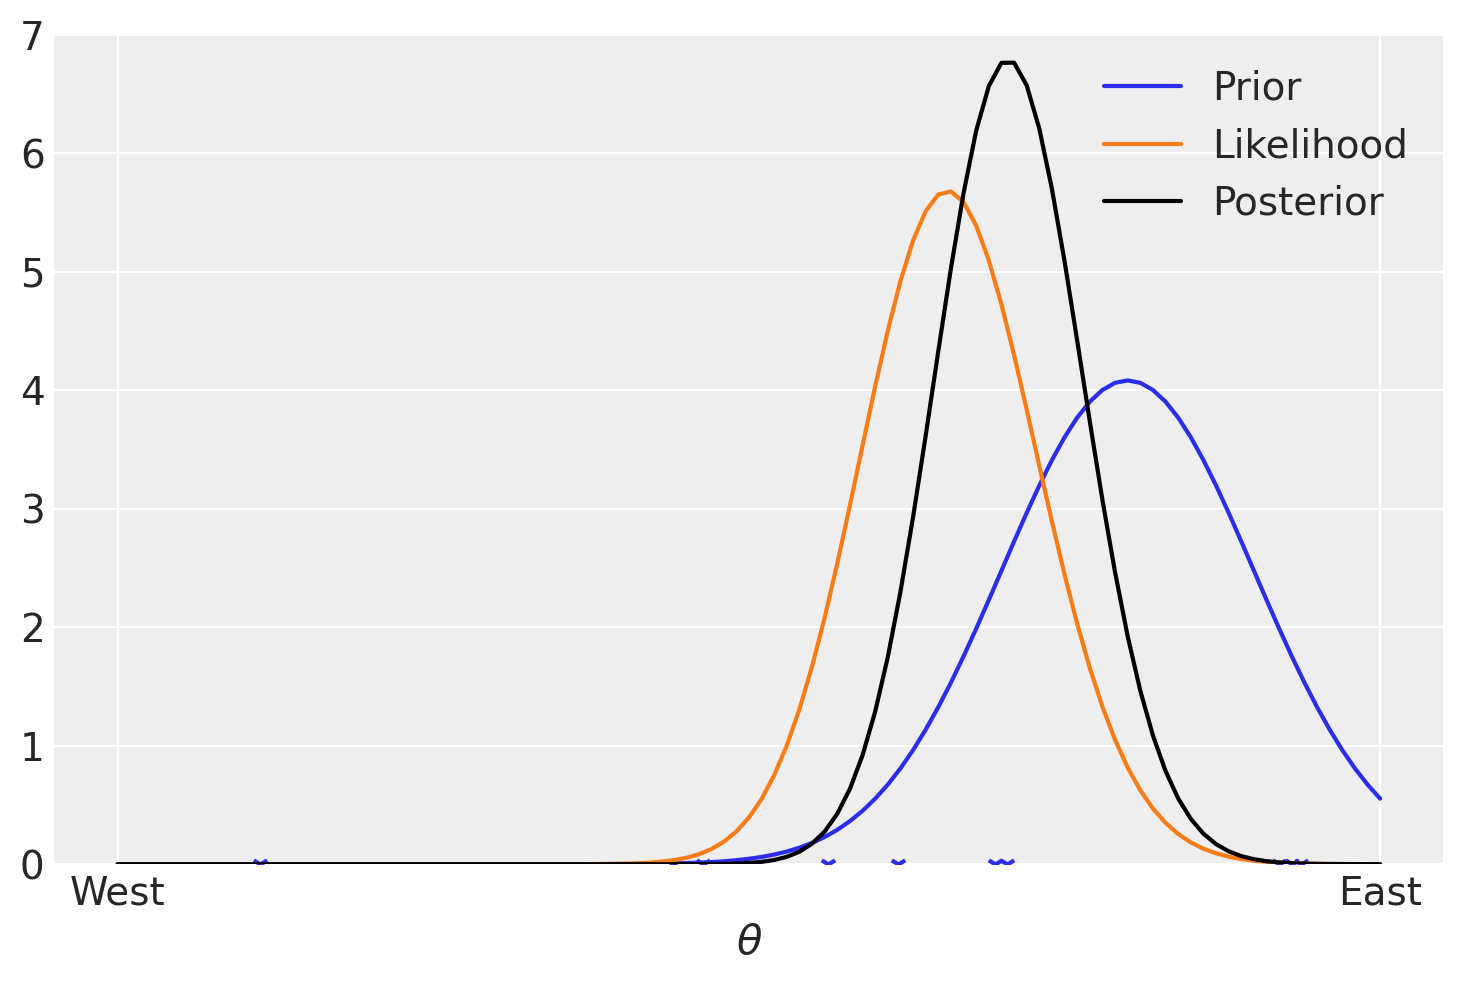

In [6]:
grid = np.linspace(0, 1, num=101)

# Prior probabilities
prior_probs = dnorm_trunc(grid, mean=0.8, sd=0.1)

# Likelihood values
lik_x = compute_lik(dat_x)

# Posterior probabilities
posterior_probs = update_probs(prior_probs, lik_x)

# Plotting
plt.plot(grid, dnorm_trunc(grid, mean=0.8, sd=0.1), label='Prior')
plt.plot(grid, lik_x, linestyle='solid', label='Likelihood')
plt.plot(grid, posterior_probs, color='black', label='Posterior')
plt.scatter(dat_x, np.zeros_like(dat_x), marker='1')
plt.ylim(0, 7)
plt.xlabel(r'$\theta$')
plt.ylabel('')
plt.xticks([0, 1], ["West", "East"])
plt.legend()
plt.show()

Il grafico illustra le tre distribuzioni coinvolte nell'aggiornamento bayesiano.

1. La curva tratteggiata rossa rappresenta la distribuzione a priori di $\theta$. Questa curva riflette le nostre credenze iniziali o le aspettative riguardo ai possibili valori di $\theta$ prima di effettuare qualsiasi osservazione. Nel nostro esempio, la distribuzione a priori è una distribuzione normale con una media di 0.8 e una deviazione standard di 0.1. Questo implica che, prima di raccogliere dati, prevediamo che il valore di $\theta$ sia prossimo a 0.8, con una limitata variazione intorno a questa media.

2. La curva continua blu rappresenta la verosimiglianza dei dati osservati dato un valore specifico di $\theta$. In altre parole, essa descrive quanto i dati osservati supportano ogni possibile valore di $\theta$. La forma della curva indica quale valore di $\theta$ risulta più plausibile in base a ciò che è stato osservato. Maggiore è l'altezza della curva in un determinato punto, maggiore è il supporto fornito dai dati a quel valore di $\theta$.

3. La curva tratteggiata nera rappresenta la distribuzione a posteriori di $\theta$. Questa curva rappresenta la nostra stima aggiornata di $\theta$ dopo aver incorporato i dati osservati e le credenze iniziali attraverso il calcolo bayesiano. La distribuzione a posteriori combina la distribuzione a priori con la verosimiglianza dei dati, fornendo una stima più precisa e informativa di $\theta$. In sostanza, essa riflette la nostra comprensione aggiornata del valore di $\theta$ più probabile, tenendo conto sia delle informazioni iniziali che dei dati osservati.

   - Il valore di $\theta$ più probabile nella distribuzione a posteriori corrisponde al punto in cui la curva raggiunge l'apice, ovvero il valore di $\theta$ in cui la densità è massima. Questo punto rappresenta la stima del parametro $\theta$ che appare più plausibile alla luce dei dati osservati e delle credenze iniziali.
   - Inoltre, la distribuzione a posteriori fornisce indicazioni sulla nostra incertezza riguardo al valore di $\theta$. Se la distribuzione a posteriori è concentrata attorno a un valore specifico di $\theta$ e presenta un picco netto, ciò suggerisce che siamo più sicuri nella stima di $\theta$ e l'incertezza è ridotta. In altre parole, i dati osservati sono informativi e hanno ridotto l'incertezza sul valore di $\theta$. Invece, se la distribuzione a posteriori è ampia e ha una forma meno definita, implica maggiore incertezza nella stima di $\theta$. Questo può accadere quando i dati osservati sono scarsi o poco informativi, oppure se la distribuzione a priori era ampia, consentendo una vasta gamma di valori di $\theta$. In sintesi, la forma della distribuzione a posteriori riflette quanto i dati raccolti ci abbiano aiutato a restringere le possibili valutazioni di $\theta$.

## Linguaggi di programmazione probabilistici

L'esempio precedente illustra il problema cui la modellazione bayesiana intende rispondere e la soluzione che essa propone per risolverlo. Finora abbiamo illustrato la logica dell'aggiornamento bayesiano, senza ancora entrare nei dettagli computazionali che verranno approfonditi nei prossimi capitoli.

Per ora, è importante sottolineare che l'attuale statistica bayesiana fa un ampio utilizzo di un linguaggio di programmazione probabilistico (*Probabilistic Programming Language*, PPL) implementato su computer per eseguire l'aggiornamento bayesiano. Questo approccio ha rivoluzionato il modo in cui si svolgevano le analisi statistiche bayesiane anche solo pochi decenni fa. L'adozione di tali metodi computazionali ha semplificato la formulazione di modelli statistici complessi, abbassando la soglia delle competenze matematiche e computazionali richieste, e agevolando il processo di modellazione bayesiana. Inoltre, questi strumenti hanno aperto nuove opportunità per affrontare problemi di analisi dei dati che, in passato, sarebbero stati notevolmente complessi da trattare.

## Notazione

Per chiarire la notazione, nel seguito useremo $y$ per rappresentare i dati e $\theta$ per indicare i parametri incogniti di un modello statistico. Entrambi, $y$ e $\theta$, saranno trattati come variabili casuali. Utilizzeremo invece $x$ per denotare le quantità note, come ad esempio i predittori di un modello lineare.

Per rappresentare in modo conciso i modelli probabilistici, adotteremo una notazione particolare. Ad esempio, invece di scrivere $p(\theta) = Beta(1, 1)$, scriveremo semplicemente $\theta \sim Beta(1, 1)$. Il simbolo "$\sim$" viene comunemente letto come "è distribuito come". Possiamo anche interpretarlo nel senso che $\theta$ è un campione casuale estratto dalla distribuzione Beta(1, 1). Allo stesso modo, la verosimiglianza di un modello binomiale sarà scritta come $y \sim \text{Bin}(n, \theta)$.

## La Distribuzione a Priori

Nessuno studio viene condotto in assenza totale di conoscenze derivate da ricerche precedenti. L'inferenza statistica bayesiana richiede semplicemente che queste conoscenze pregresse vengano esplicitate, per poi essere messe alla prova dai dati effettivi a disposizione. Le distribuzioni a priori codificano direttamente le nostre assunzioni riguardo ai valori ragionevoli dei parametri del modello.

### Distribuzioni a Priori Non Informativa

Le distribuzioni a priori possono differire in base al grado di certezza con cui spingono il ricercatore a considerare credibile un determinato intervallo di valori dei parametri. Un caso estremo è rappresentato dalle distribuzioni a priori *non informative*, che indicano una totale mancanza di conoscenza pregressa e assegnano lo stesso livello di credibilità a tutti i valori dei parametri. Questi tipi di priori vengono anche definiti come priori vaghi o diffusi. Una delle distribuzioni a priori non informative più ovvie da utilizzare è la distribuzione di probabilità uniforme su un intervallo sensato di valori dei parametri. L'applicazione della distribuzione uniforme si basa sul Principio della Ragione Insufficiente, enunciato per la prima volta da Laplace (1774/1951), che afferma che in assenza di qualsiasi evidenza rilevante (precedente), si dovrebbero assegnare le proprie gradi di credibilità in modo uguale tra tutti gli esiti possibili.

### Distribuzioni a Priori Debolmente Informativa

Le distribuzioni a priori debolmente informative sono distribuzioni di probabilità che forniscono un metodo per incorporare meno informazioni di quante se ne abbiano effettivamente in una particolare situazione. Una distribuzione a priori debolmente informativa che contiene un intervallo di valori ragionevoli dei parametri per riflettere le assunzioni ragionevoli sui parametri ma riconoscendo anche le incertezze in un'analisi data, risulta utile nel stabilizzare le stime di un modello. L'inferenza bayesiana può richiedere un impegno computazionale notevole, specialmente per modelli gerarchici. Pertanto, fornire informazioni a priori debolmente informative può aiutare a stabilizzare l'analisi senza influenzare le inferenze.

### Distribuzioni a Priori Informativa

Ricerche precedenti, opinioni esperte, o entrambe, possono essere utilizzate per affrontare un problema e essere incorporate sistematicamente nelle distribuzioni a priori. Questi tipi di priori sono denominati come distribuzioni a priori informative. Queste distribuzioni riflettono informazioni concrete e pertinenti che possono avere un impatto significativo sull'analisi, fornendo una base di conoscenza su cui costruire l'inferenza bayesiana. Le distribuzioni a priori informative possono provenire da una varietà di fonti e offrono un modo strutturato per integrare la conoscenza pregressa nel processo di analisi statistica, migliorando così la robustezza e l'accuratezza delle conclusioni estratte dai dati.

## La verosimiglianza marginale

La formula completa della distribuzione a posteriori si esprime come segue:

$$
p(\theta \mid y) = \frac{p(y \mid \theta) p(\theta)}{\int_{\Theta}p(y \mid \theta) p(\theta) \,d\theta} \quad \text{per} \quad \theta \in \Theta, 
$$

dove $\Theta$ rappresenta lo spazio dei possibili valori del parametro $\theta$.

Per calcolare $p(\theta \mid y)$, è necessario dividere il prodotto tra la distribuzione a priori e la verosimiglianza per una costante di normalizzazione. Questa costante, chiamata *verosimiglianza marginale*, viene introdotta per garantire che $p(\theta \mid y)$ abbia un'area unitaria sotto la curva. Tuttavia, l'integrale al denominatore della formula {eq}`eq-bayes-intro` spesso risulta difficile da risolvere analiticamente. Di conseguenza, l'inferenza bayesiana procede generalmente mediante metodi di approssimazione numerica.

## Metodi di stima della distribuzione a posteriori

Ci sono due principali strategie per calcolare la distribuzione a posteriori:

1. **Metodo esatto**: Questo approccio è applicabile quando la distribuzione a priori e la funzione di verosimiglianza appartengono alla stessa classe di distribuzioni, note come *distribuzioni a priori coniugate*. Quando ciò accade, la distribuzione a posteriori può essere determinata analiticamente, senza necessità di approssimazioni. Questo metodo è elegante e computazionalmente efficiente, ma ha una portata limitata, in quanto le distribuzioni a priori coniugate esistono solo per certe combinazioni specifiche di distribuzioni a priori e verosimiglianze.
2. **Metodo approssimato**: Quando il metodo esatto non può essere utilizzato, ad esempio, quando le distribuzioni a priori e le verosimiglianze non sono coniugate, si può ricorrere al metodo approssimato. Questo implica l'uso di algoritmi computazionalmente intensivi, come le Catene di Markov Monte Carlo (MCMC), per stimare la distribuzione a posteriori. Sebbene questo approccio sia più flessibile e applicabile a una vasta gamma di scenari, richiede più risorse computazionali e può essere più lento rispetto al metodo esatto.

## Il flusso di lavoro bayesiano

Dopo aver analizzato l'esempio introduttivo delineato nelle sezioni precedenti, esploriamo ora con maggiore attenzione il cosiddetto flusso di lavoro bayesiano. Metaforicamente definito come il processo di "girare la manovella Bayesiana", il flusso di lavoro bayesiano enfatizza un approccio iterativo e adattabile nel contesto della ricerca scientifica. Questo procedimento, ben delineato nella figura tratta dall'articolo di {cite:t}`baribault2023troubleshooting`, è caratterizzato da diverse fasi cruciali che vanno dalla definizione delle priori all'inferenza basata sui dati a posteriori. 

```{figure} ../images/bayesian_workflow.png
---
height: 550px
name: bayes-workflow-fig
---
Una rappresentazione abbreviata del flusso di lavoro bayesiano. L'output del modello che non supera il filtro (che rappresenta i necessari controlli computazionali e di coerenza) deve essere respinto. È necessario migliorare la specifica del modello in modo che l'output possa  superare tutti i controlli. Solo allora il modello bayesiano può essere utilizzato come base per l'inferenza. (Figura tratta da {cite:t}`baribault2023troubleshooting`).
```

### Fasi del flusso di lavoro

Di seguito, delineiamo le fasi essenziali nel flusso di lavoro Bayesiano:

1. **Studio di simulazione**: Qui, l'obiettivo è generare dati sintetici che replicano fedelmente il contesto della ricerca, verificando la robustezza del disegno sperimentale e assicurando che le specificazioni del modello siano appropriate.
   
2. **Raccolta e identificazione dei dati**: Questa fase comporta l'acquisizione e l'esplorazione preliminare dei dati reali, garantendo che siano adeguati e preparati correttamente per le analisi successive.

3. **Selezione del modello statistico**: In questa fase, si formula un modello statistico che rappresenta accuratamente le teorie e le ipotesi sottostanti alla ricerca, basandosi su una solida comprensione del fenomeno in esame e su principi statistici ben fondati.

4. **Definizione delle distribuzioni a priori**: Qui, si definiscono le distribuzioni a priori dei parametri del modello, basandosi su conoscenze preesistenti e su un ragionamento teorico valido.

5. **Calcolo delle distribuzioni a posteriori**: Utilizzando metodi analitici o, più comunemente, tecniche di campionamento come Monte Carlo a Catene di Markov (MCMC), si derivano le distribuzioni a posteriori dei parametri.

6. **Troubleshooting e diagnostica**: In questa fase, si effettuano controlli rigorosi sulla convergenza del modello e sulla validità delle inferenze, attraverso metriche e diagnosi specializzate.

7. **Controlli di coerenza**: Oltre alla diagnostica tecnica, è fondamentale valutare la coerenza e la plausibilità del modello in rapporto ai dati e al contesto teorico, compresa una valutazione predittiva a posteriori.

8. **Interpretazione e comunicazione dei risultati**: Infine, si interpretano i risultati nel contesto della teoria sottostante e si comunicano in modo chiaro ed efficace, integrandoli nel quadro più ampio della comprensione del fenomeno studiato.

Attraverso questo processo iterativo e rigoroso, il flusso di lavoro Bayesiano mira a costruire modelli statistici robusti e inferenze valide, fornendo un quadro solido per la ricerca scientifica in vari campi, inclusa la psicologia.

## Commenti e considerazioni finali 

L'approccio bayesiano offre una modalità distintiva per gestire l'incertezza associata ai parametri di interesse, distinguendosi nettamente dalla metodologia classica. Contrariamente all'idea che i parametri siano valori fissi e ignoti, l'approccio bayesiano li considera come quantità probabilistiche, attribuendo loro una distribuzione a priori che rappresenta le nostre credenze e intuizioni iniziali prima di condurre l'esperimento. Mediante l'applicazione del teorema di Bayes, queste credenze vengono modificate e affinate sulla base dei dati raccolti, portando alla definizione della distribuzione a posteriori. Quest'ultima esprime una visione aggiornata dell'incertezza, incorporando sia l'evidenza empirica che le informazioni preesistenti.

La forza dell'approccio bayesiano sta nella sua capacità di integrare le conoscenze pregresse con le nuove osservazioni, fornendo stime del parametro di interesse sia più accurate che ricche di significato. Questa metodologia va oltre la semplice analisi, guidando il processo decisionale e permettendo di affrontare l'incertezza con una comprensione profonda, coniugando conoscenze teoriche ed evidenze empiriche. In ultima analisi, l'approccio bayesiano non è solo un metodo statistico, ma uno strumento decisionale che valorizza l'interazione dinamica tra teoria ed esperienza.